# CT Images Denoising - DnCNN

This notebook summarize the main results of training a DnCNN model using CT, DL or DL with texture dataset. Also, it shows the performance evolution while trying few reduction or mixing dataset. 

**Author:** [Paulo Ribeiro](https://people.epfl.ch/paulo.ribeirodecarvalho) ([contact](mailto:paulo.ribeirodecarvalho@epfl.ch))

## Import

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import v2
from models.cnn_viewer import CnnViewer
from models.noises import gaussian
from utils import display_test_results, models_comparaison, models_evolution, display_images
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

## Models

Few models have been trained to quantify the models performances. Only the main models training evolution are displayed here.

### Computed Tomography Model 

This DnCNN model have been trained only with the full CT dataset. No DL was added in the dataset.

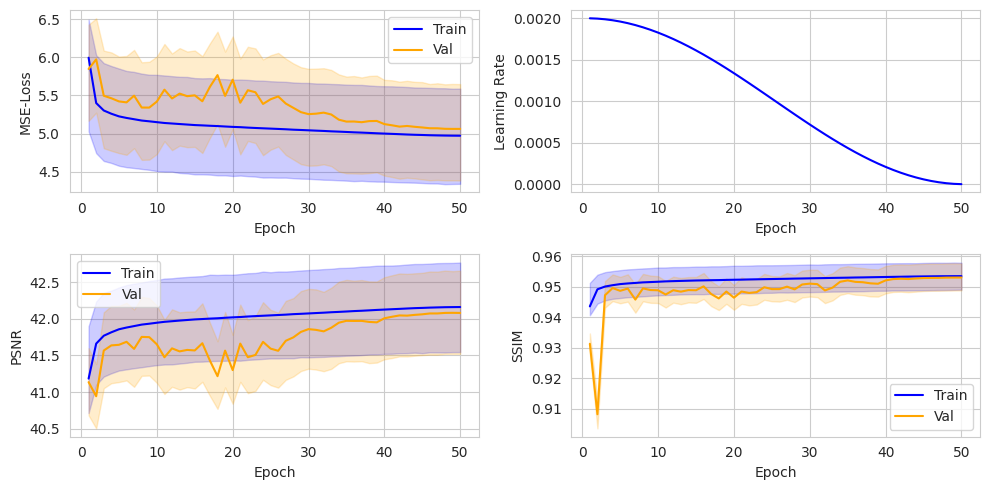

In [2]:
# model train with a smaller initial lr -> 2e-3
cnn_ct = CnnViewer(model_path='models/dncnn/ct_baseline_full/training_save_epoch_50.tar',
                   model_name='DnCNN',
                   device='cuda')

cnn_ct.print_training_stats()

### Dead Leaves Model

This DnCNN model have been trained only with the full DL dataset. No CT was added in the dataset.

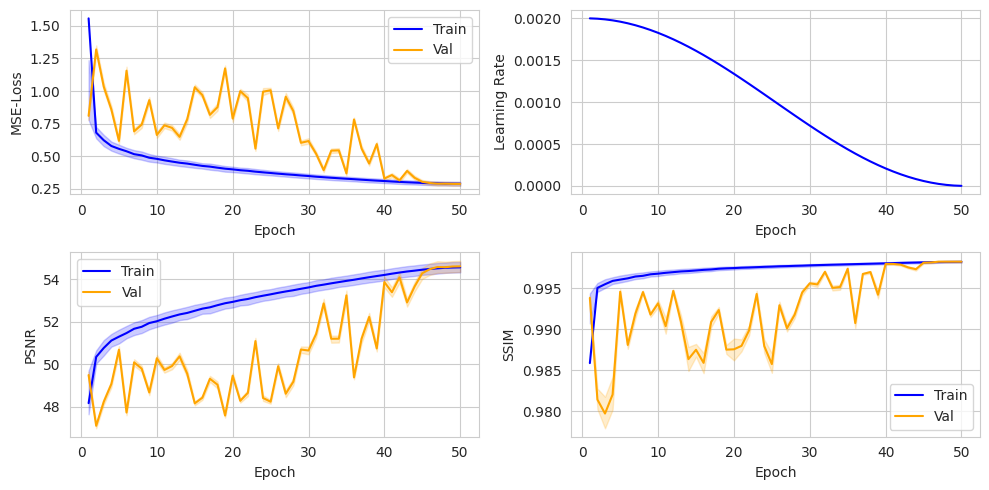

In [3]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_no_texture = CnnViewer(
    model_path='models/dncnn/dl_no_texture/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_no_texture.print_training_stats()

### Dead Leaves w/ texture Model

This DnCNN model have been trained only with the full DL w/ texture dataset. No CT or DL was added in the dataset.

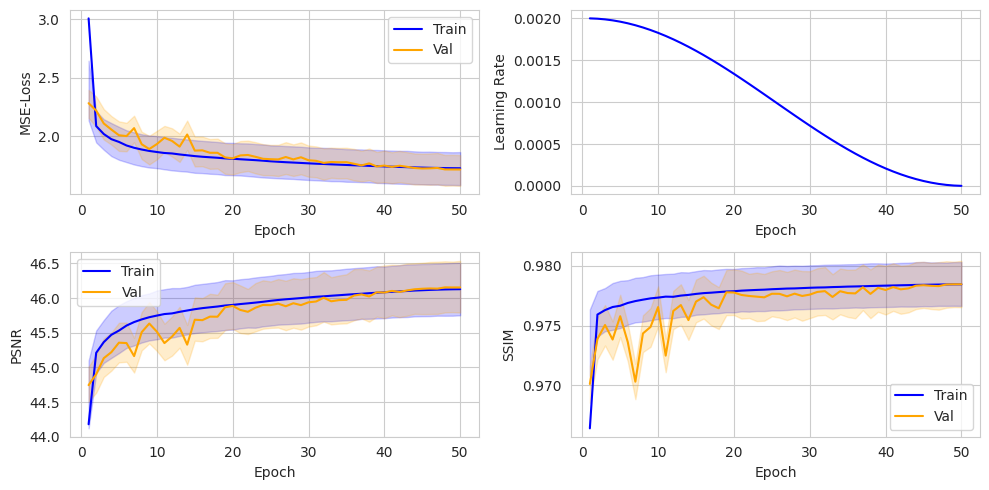

In [4]:
# model train with DL with a smaller initial lr -> 2e-3
cnn_dl_texture = CnnViewer(
    model_path='models/dncnn/dl_texture/training_save_epoch_50.tar',
    model_name='DnCNN',
    device='cuda'
)

cnn_dl_texture.print_training_stats()

## Results

Progress of predictions: 222it [01:06,  3.36it/s]                         
Progress of predictions: 222it [01:04,  3.44it/s]                         
Progress of predictions: 222it [01:05,  3.40it/s]                         


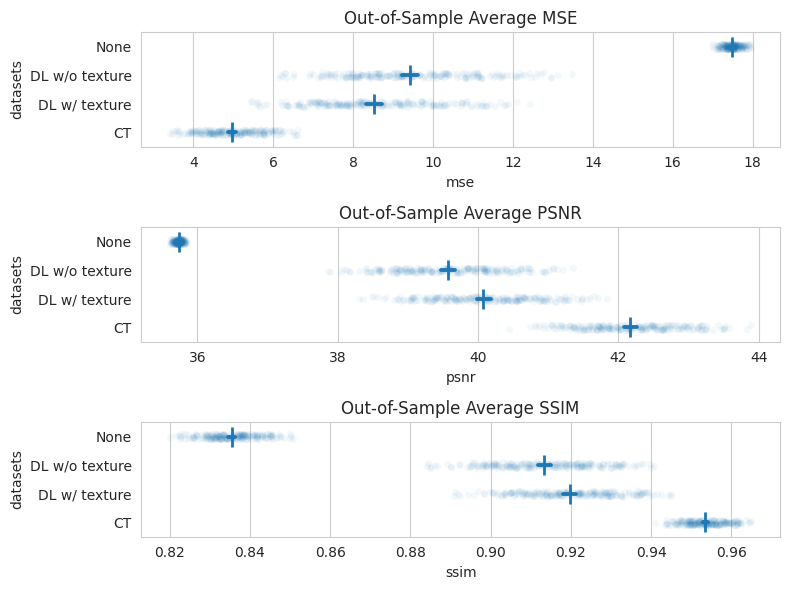

In [5]:
perf, images = models_comparaison()

Progress of predictions: 222it [01:04,  3.44it/s]                         
Progress of predictions: 222it [01:04,  3.43it/s]                         
Progress of predictions: 222it [01:04,  3.42it/s]                         
Progress of predictions: 222it [01:03,  3.48it/s]                         
Progress of predictions: 222it [01:04,  3.42it/s]                         
Progress of predictions: 222it [01:04,  3.47it/s]                         
Progress of predictions: 222it [01:03,  3.49it/s]                         
Progress of predictions: 222it [01:03,  3.52it/s]                         
Progress of predictions: 222it [01:03,  3.52it/s]                         
Progress of predictions: 222it [01:03,  3.50it/s]                         


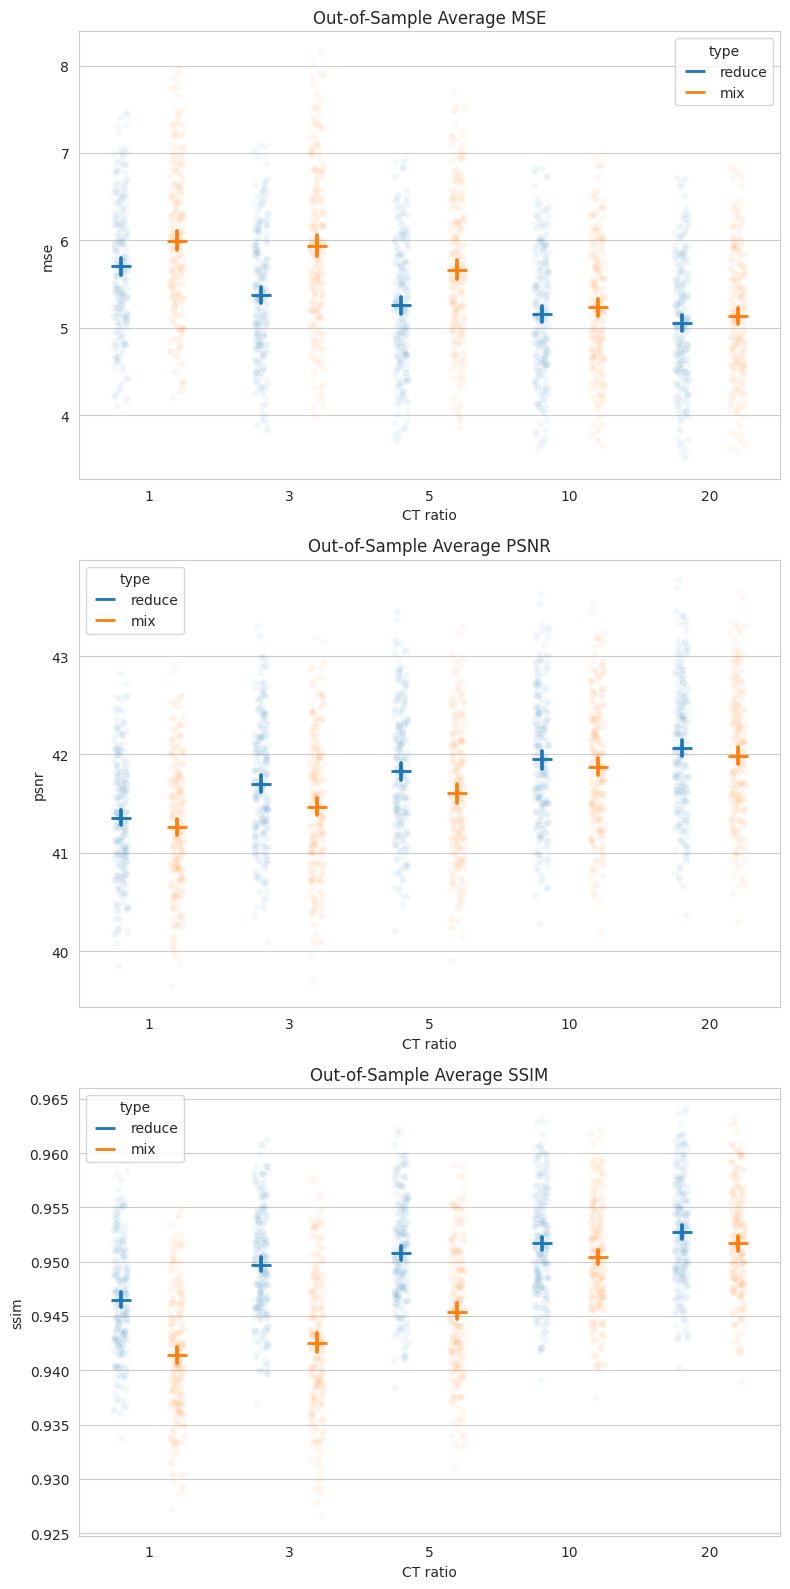

In [6]:
perf_evolution = models_evolution()

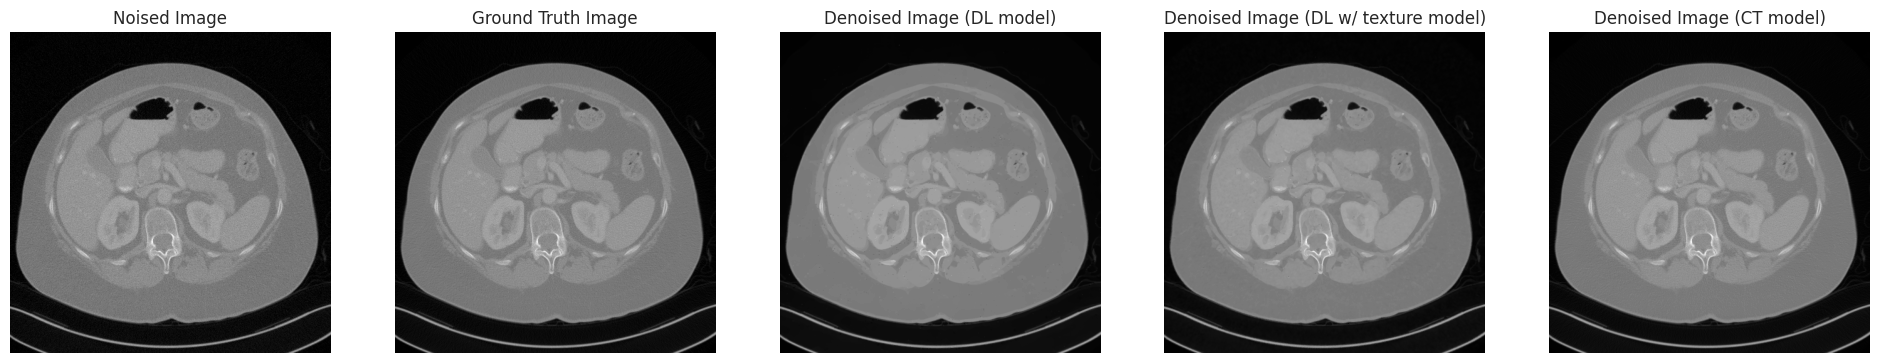

In [7]:
display_images(images=images, idx=90)#, save_fig='denoised_images_comparaison')